# Machine Learning With Spark ML
In this lab assignment, you will complete a project by going through the following steps:
1. Get the data.
2. Discover the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.
5. Fine-tune your model.
6. Present your solution.

As a dataset, we use the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. The dataset has the following columns
1. `longitude`: a measure of how far west a house is (a higher value is farther west)
2. `latitude`: a measure of how far north a house is (a higher value is farther north)
3. `housing_,median_age`: median age of a house within a block (a lower number is a newer building)
4. `total_rooms`: total number of rooms within a block
5. `total_bedrooms`: total number of bedrooms within a block
6. `population`: total number of people residing within a block
7. `households`: total number of households, a group of people residing within a home unit, for a block
8. `median_income`: median income for households within a block of houses
9. `median_house_value`: median house value for households within a block
10. `ocean_proximity`: location of the house w.r.t ocean/sea

---
# 1. Get the data
Let's start the lab by loading the dataset. The can find the dataset at `data/housing.csv`. To infer column types automatically, when you are reading the file, you need to set `inferSchema` to true. Moreover enable the `header` option to read the columns' name from the file.

In [0]:
# SUBMISSION BY SARTHAK LANGDE & BORIS BUBLA

# File location and type
file_location = "/FileStore/tables/housing.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
housing = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(housing)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
# Imports

# basics
from pyspark.sql.functions import sum,avg,max,min,mean,count,col,countDistinct,desc,when
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

# feat engineering
from pyspark.ml.feature import VectorAssembler, Imputer, StandardScaler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# model selection
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# models
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, GBTRegressor, RandomForestRegressor


---
# 2. Discover the data to gain insights
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:
* See the schema and dimension of the dataset
* Look at the data itself
* Statistical summary of the attributes
* Breakdown of the data by the categorical attribute variable
* Find the correlation among different attributes
* Make new attributes by combining existing attributes

## 2.1. Schema and dimension
Print the schema of the dataset

In [0]:
print('Schema:')
housing.printSchema

Schema:
Out[100]: <bound method DataFrame.printSchema of DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double, ocean_proximity: string]>

Print the number of records in the dataset.

In [0]:
print('Number of records:')
housing.count()

Number of records:
Out[101]: 20640

## 2.2. Look at the data
Print the first five records of the dataset.

In [0]:
print('First five records')
housing.head(5)

First five records
Out[102]: [Row(longitude=-122.23, latitude=37.88, housing_median_age=41.0, total_rooms=880.0, total_bedrooms=129.0, population=322.0, households=126.0, median_income=8.3252, median_house_value=452600.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.22, latitude=37.86, housing_median_age=21.0, total_rooms=7099.0, total_bedrooms=1106.0, population=2401.0, households=1138.0, median_income=8.3014, median_house_value=358500.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.24, latitude=37.85, housing_median_age=52.0, total_rooms=1467.0, total_bedrooms=190.0, population=496.0, households=177.0, median_income=7.2574, median_house_value=352100.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.25, latitude=37.85, housing_median_age=52.0, total_rooms=1274.0, total_bedrooms=235.0, population=558.0, households=219.0, median_income=5.6431, median_house_value=341300.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.25, latitude=37.85, housing_median_age=52.0, total_rooms=1627.0, total_bedrooms=280.0, population=565.0, households=259.0, median_income=3.8462, median_house_value=342200.0, ocean_proximity='NEAR BAY')]

Print the number of records with population more than 10000.

In [0]:
housing.where("population > 10000").count()

Out[103]: 23

## 2.3. Statistical summary
Print a summary of the table statistics for the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. You can use the `describe` command.

In [0]:
housing.describe("housing_median_age","total_rooms","median_house_value","population").show()

+-------+------------------+------------------+------------------+------------------+
summary|housing_median_age| total_rooms|median_house_value| population|
+-------+------------------+------------------+------------------+------------------+
 count| 20640| 20640| 20640| 20640|
 mean|28.639486434108527|2635.7630813953488|206855.81690891474|1425.4767441860465|
 stddev| 12.58555761211163|2181.6152515827944|115395.61587441359| 1132.46212176534|
 min| 1.0| 2.0| 14999.0| 3.0|
 max| 52.0| 39320.0| 500001.0| 35682.0|
+-------+------------------+------------------+------------------+------------------+

Print the maximum age (`housing_median_age`), the minimum number of rooms (`total_rooms`), and the average of house values (`median_house_value`).

In [0]:


housing.select(max('housing_median_age'), min('total_rooms'), mean('median_house_value')).show()


+-----------------------+----------------+-----------------------+
max(housing_median_age)|min(total_rooms)|avg(median_house_value)|
+-----------------------+----------------+-----------------------+
 52.0| 2.0| 206855.81690891474|
+-----------------------+----------------+-----------------------+

## 2.4. Breakdown the data by categorical data
Print the number of houses in different areas (`ocean_proximity`), and sort them in descending order.

In [0]:


print('Num houses in area in descending order:')
housing.groupby("ocean_proximity").count().sort(desc("count")).show()

Num houses in area in descending order:
+---------------+-----+
ocean_proximity|count|
+---------------+-----+
 <1H OCEAN| 9136|
 INLAND| 6551|
 NEAR OCEAN| 2658|
 NEAR BAY| 2290|
 ISLAND| 5|
+---------------+-----+

Print the average value of the houses (`median_house_value`) in different areas (`ocean_proximity`), and call the new column `avg_value` when print it.

In [0]:
# python version
housing.groupby('ocean_proximity').agg(avg('median_house_value').alias('avg_value')).show()

+---------------+------------------+
ocean_proximity| avg_value|
+---------------+------------------+
 ISLAND| 380440.0|
 NEAR OCEAN|249433.97742663656|
 NEAR BAY|259212.31179039303|
 <1H OCEAN|240084.28546409807|
 INLAND|124805.39200122119|
+---------------+------------------+

Rewrite the above question in SQL.

In [0]:
# sql version
housing.createOrReplaceTempView("df")
sqlDF = spark.sql("SELECT ocean_proximity, AVG(median_house_value) as avg_value FROM df GROUP BY ocean_proximity")
sqlDF.show()

+---------------+------------------+
ocean_proximity| avg_value|
+---------------+------------------+
 ISLAND| 380440.0|
 NEAR OCEAN|249433.97742663656|
 NEAR BAY|259212.31179039303|
 <1H OCEAN|240084.28546409807|
 INLAND|124805.39200122119|
+---------------+------------------+

## 2.5. Correlation among attributes
Print the correlation among the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. To do so, first you need to put these attributes into one vector. Then, compute the standard correlation coefficient (Pearson) between every pair of attributes in this new vector. To make a vector of these attributes, you can use the `VectorAssembler` Transformer.

In [0]:
housing.select("total_rooms")

Out[109]: DataFrame[total_rooms: double]

In [0]:

# setup vector assembler
assembler = VectorAssembler(
    inputCols=["housing_median_age", "total_rooms", "median_house_value", "population"],
    outputCol="features")

# apply transformation
housingAttrs = assembler.transform(housing)
# show
housingAttrs.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity| features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
 -122.23| 37.88| 41.0| 880.0| 129.0| 322.0| 126.0| 8.3252| 452600.0| NEAR BAY|[41.0,880.0,45260...|
 -122.22| 37.86| 21.0| 7099.0| 1106.0| 2401.0| 1138.0| 8.3014| 358500.0| NEAR BAY|[21.0,7099.0,3585...|
 -122.24| 37.85| 52.0| 1467.0| 190.0| 496.0| 177.0| 7.2574| 352100.0| NEAR BAY|[52.0,1467.0,3521...|
 -122.25| 37.85| 52.0| 1274.0| 235.0| 558.0| 219.0| 5.6431| 341300.0| NEAR BAY|[52.0,1274.0,3413...|
 -122.25| 37.85| 52.0| 1627.0| 280.0| 565.0| 259.0| 3.8462| 342200.0| NEAR BAY|[52.0,1627.0,3422...|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
only showing top 5 rows

In [0]:

coeff = Correlation.corr(housingAttrs, "features").head()
print("Pearson correlation matrix:\n" + str(coeff[0]))

/databricks/spark/python/pyspark/sql/context.py:120: DeprecationWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
 DeprecationWarning)
Pearson correlation matrix:
DenseMatrix([[ 1. , -0.3612622 , 0.10562341, -0.29624424],
 [-0.3612622 , 1. , 0.13415311, 0.85712597],
 [ 0.10562341, 0.13415311, 1. , -0.02464968],
 [-0.29624424, 0.85712597, -0.02464968, 1. ]])

## 2.6. Combine and make new attributes
Now, let's try out various attribute combinations. In the given dataset, the total number of rooms in a block is not very useful, if we don't know how many households there are. What we really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful, and we want to compare it to the number of rooms. And the population per household seems like also an interesting attribute combination to look at. To do so, add the three new columns to the dataset as below. We will call the new dataset the `housingExtra`.
```
rooms_per_household = total_rooms / households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / households
```

In [0]:
housingExtra = (housing.withColumn('rooms_per_household', housing['total_rooms']/housing['households'])
.withColumn('bedrooms_per_room', housing['total_bedrooms']/housing['total_rooms'])
.withColumn('population_per_household', housing['population']/housing['households']))

housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").show(5)

+-------------------+-------------------+------------------------+
rooms_per_household| bedrooms_per_room|population_per_household|
+-------------------+-------------------+------------------------+
 6.984126984126984|0.14659090909090908| 2.5555555555555554|
 6.238137082601054|0.15579659106916466| 2.109841827768014|
 8.288135593220339|0.12951601908657123| 2.8022598870056497|
 5.8173515981735155|0.18445839874411302| 2.547945205479452|
 6.281853281853282| 0.1720958819913952| 2.1814671814671813|
+-------------------+-------------------+------------------------+
only showing top 5 rows

---
## 3. Prepare the data for Machine Learning algorithms
Before going through the Machine Learning steps, let's first rename the label column from `median_house_value` to `label`.

In [0]:
renamedHousing = housingExtra.withColumnRenamed("median_house_value","label")

Now, we want to separate the numerical attributes from the categorical attribute (`ocean_proximity`) and keep their column names in two different lists. Moreover, since we don't want to apply the same transformations to the predictors (features) and the label, we should remove the label attribute from the list of predictors.

In [0]:
# label, categorical, numerical
colLabel = 'label'
colCat = 'ocean_proximity'

def Num(col):
  return ((col!=colLabel)&(col!=colCat))

colNum = list(filter(Num, renamedHousing.columns))
print(colNum)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

## 3.1. Prepare continuse attributes
### Data cleaning
Most Machine Learning algorithms cannot work with missing features, so we should take care of them. As a first step, let's find the columns with missing values in the numerical attributes. To do so, we can print the number of missing values of each continues attributes, listed in `colNum`.

In [0]:

renamedHousing.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in colNum)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+
longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|rooms_per_household|bedrooms_per_room|population_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+
 0| 0| 0| 0| 207| 0| 0| 0| 0| 207| 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+

As we observerd above, the `total_bedrooms` and `bedrooms_per_room` attributes have some missing values. One way to take care of missing values is to use the `Imputer` Transformer, which completes missing values in a dataset, either using the mean or the median of the columns in which the missing values are located. To use it, you need to create an `Imputer` instance, specifying that you want to replace each attribute's missing values with the "median" of that attribute.

In [0]:

#Imputer
lst = ['total_bedrooms','bedrooms_per_room']

imputer = Imputer(strategy='median', 
    inputCols=lst, 
    #outputCols=["{}_imputed".format(c) for c in lst]
    outputCols=lst
)

#impute
imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

imputedHousing.select("total_bedrooms", "bedrooms_per_room").show(100)

+--------------+-------------------+
total_bedrooms| bedrooms_per_room|
+--------------+-------------------+
 129.0|0.14659090909090908|
 1106.0|0.15579659106916466|
 190.0|0.12951601908657123|
 235.0|0.18445839874411302|
 280.0| 0.1720958819913952|
 213.0|0.23177366702937977|
 489.0|0.19289940828402366|
 687.0|0.22132731958762886|
 665.0| 0.2602739726027397|
 707.0| 0.1992110453648915|
 434.0|0.19709355131698456|
 752.0| 0.2146731373108764|
 474.0| 0.1902850260939382|
 191.0| 0.2744252873563218|
 626.0|0.23685206205069997|
 283.0| 0.2526785714285714|
 347.0|0.17650050864699898|
 293.0|0.23859934853420195|
 455.0|0.20321572130415363|
 298.0|0.19827012641383898|
 184.0|0.24500665778961384|
 367.0| 0.2239170225747407|
 541.0|0.22208538587848933|
 337.0|0.19964454976303317|
 437.0|0.19649280575539568|
 123.0|0.22990654205607478|
 244.0| 0.215929203539823|
 421.0|0.22181243414120128|
 492.0|0.23631123919308358|
 160.0| 0.2194787379972565|
 447.0|0.23329853862212943|
 481.0|0.22340919647004182|
 409.0|0.21279916753381894|
 366.0|0.22114803625377644|
 574.0| 0.2153846153846154|
 282.0|0.23209876543209876|
 432.0|0.24026696329254726|
 390.0|0.25810721376571805|
 330.0|0.22448979591836735|
 715.0|0.29399671052631576|
 419.0|0.25165165165165165|
 311.0|0.33226495726495725|
 202.0|0.28330995792426367|
 202.0|0.21263157894736842|
 311.0|0.21552321552321552|
 420.0| 0.2536231884057971|
 322.0| 0.2862222222222222|
 312.0| 0.3098311817279047|
 195.0| 0.3125|
 375.0| 0.3964059196617336|
 453.0| 0.5055803571428571|
 456.0|0.24411134903640258|
 853.0|0.26482458863706926|
 456.0|0.27975460122699386|
 235.0|0.20085470085470086|
 243.0| 0.2571428571428571|
 288.0|0.23263327948303716|
 335.0|0.22498321020819342|
 341.0|0.24585436193222782|
 43.0| 0.2721518987341772|
 211.0|0.18822479928635147|
 29.0|0.21481481481481482|
 190.0| 0.25|
 237.0|0.19362745098039216|
 182.0|0.21980676328502416|
 209.0|0.20693069306930692|
 354.0|0.24329896907216494|
 244.0|0.23758519961051608|
 109.0|0.19055944055944055|
 644.0|0.22991788646911818|
 152.0|0.19791666666666666|
 297.0| 0.3176470588235294|
 204.0|0.24170616113744076|
 4.0| 0.3333333333333333|
 161.0|0.19281437125748502|
 462.0| 0.3734842360549717|
 562.0| 0.1928620452985587|
 243.0|0.20132560066280034|
 374.0|0.21432664756446992|
 176.0| 0.2573099415204678|
 289.0|0.31277056277056275|
 56.0|0.26666666666666666|
 97.0| 0.2852941176470588|
 164.0|0.42487046632124353|
 184.0| 0.1940928270042194|
 143.0|0.18499353169469598|
 451.0| 0.5125|
 348.0| 0.3977142857142857|
 42.0| 0.4|
 78.0| 0.3132530120481928|
 392.0|0.39436619718309857|
 87.0| 0.4046511627906977|
 31.0| 0.3229166666666667|
 347.0| 0.3289099526066351|
 623.0| 0.363265306122449|
 2477.0| 0.4648151623193845|
 1331.0|0.28959965187119235|
 107.0| 0.3194029850746269|
 1270.0| 0.3449212384573601|
 1085.0|0.29865125240847784|
+--------------+-------------------+
only showing top 100 rows

In [0]:
imputedHousing.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in colNum)).show()
# no more nan values

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+
longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|rooms_per_household|bedrooms_per_room|population_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------------+-----------------+------------------------+

### Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the label attribues is generally not required.

One way to get all attributes to have the same scale is to use standardization. In standardization, for each value, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. To do this, we can use the `StandardScaler` Estimator. To use `StandardScaler`, again we need to convert all the numerical attributes into a big vectore of features using `VectorAssembler`, and then call `StandardScaler` on that vactor.

In [0]:


# setup vector assembler
assembler = VectorAssembler(
    inputCols=colNum,
    outputCol="numFeatures")
featuredHousing = assembler.transform(imputedHousing)

# StandardScaler
scaler = StandardScaler(inputCol="numFeatures", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
scaledHousing = scaler.fit(featuredHousing).transform(featuredHousing)
scaledHousing.select('scaledFeatures').show()

+--------------------+
 scaledFeatures|
+--------------------+
[-61.007269596069...|
[-61.002278409814...|
[-61.012260782324...|
[-61.017251968579...|
[-61.017251968579...|
[-61.017251968579...|
[-61.017251968579...|
[-61.017251968579...|
[-61.022243154834...|
[-61.017251968579...|
[-61.022243154834...|
[-61.022243154834...|
[-61.022243154834...|
[-61.022243154834...|
[-61.022243154834...|
[-61.022243154834...|
[-61.027234341089...|
[-61.027234341089...|
[-61.022243154834...|
[-61.027234341089...|
+--------------------+
only showing top 20 rows

## 3.2. Prepare categorical attributes
After imputing and scaling the continuse attributes, we should take care of the categorical attributes. Let's first print the number of distict values of the categirical attribute `ocean_proximity`.

In [0]:

housingExtra.select(countDistinct('ocean_proximity')).show()

+-------------------------------+
count(DISTINCT ocean_proximity)|
+-------------------------------+
 5|
+-------------------------------+

### String indexer
Most Machine Learning algorithms prefer to work with numbers. So let's convert the categorical attribute `ocean_proximity` to numbers. To do so, we can use the `StringIndexer` that encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [0]:


catHousing = housingExtra.select('ocean_proximity')

indexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_num")
indexed = indexer.fit(catHousing).transform(catHousing)
indexed.show()

+---------------+-------------------+
ocean_proximity|ocean_proximity_num|
+---------------+-------------------+
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
 NEAR BAY| 3.0|
+---------------+-------------------+
only showing top 20 rows

Now we can use this numerical data in any Machine Learning algorithm. You can look at the mapping that this encoder has learned using the `labels` method: "<1H OCEAN" is mapped to 0, "INLAND" is mapped to 1, etc.

In [0]:
indexer.fit(catHousing).labels

Out[121]: ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

### One-hot encoding
Now, convert the label indices built in the last step into one-hot vectors. To do this, you can take advantage of the `OneHotEncoderEstimator` Estimator.

In [0]:
encoder = OneHotEncoder(inputCols=["ocean_proximity_num"], outputCols=["ocean_proximity_onehot"])
                                   
model = encoder.fit(indexed)
encoded = model.transform(indexed)
encoded.show()

+---------------+-------------------+----------------------+
ocean_proximity|ocean_proximity_num|ocean_proximity_onehot|
+---------------+-------------------+----------------------+
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
 NEAR BAY| 3.0| (4,[3],[1.0])|
+---------------+-------------------+----------------------+
only showing top 20 rows

---
# 4. Pipeline
As you can see, there are many data transformation steps that need to be executed in the right order. For example, you called the `Imputer`, `VectorAssembler`, and `StandardScaler` from left to right. However, we can use the `Pipeline` class to define a sequence of Transformers/Estimators, and run them in order. A `Pipeline` is an `Estimator`, thus, after a Pipeline's `fit()` method runs, it produces a `PipelineModel`, which is a `Transformer`.

Now, let's create a pipeline called `numPipeline` to call the numerical transformers you built above (`imputer`, `va`, and `scaler`) in the right order from left to right, as well as a pipeline called `catPipeline` to call the categorical transformers (`indexer` and `encoder`). Then, put these two pipelines `numPipeline` and `catPipeline` into one pipeline.

In [0]:
renamedHousing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+
longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income| label|ocean_proximity|rooms_per_household| bedrooms_per_room|population_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+
 -122.23| 37.88| 41.0| 880.0| 129.0| 322.0| 126.0| 8.3252|452600.0| NEAR BAY| 6.984126984126984|0.14659090909090908| 2.5555555555555554|
 -122.22| 37.86| 21.0| 7099.0| 1106.0| 2401.0| 1138.0| 8.3014|358500.0| NEAR BAY| 6.238137082601054|0.15579659106916466| 2.109841827768014|
 -122.24| 37.85| 52.0| 1467.0| 190.0| 496.0| 177.0| 7.2574|352100.0| NEAR BAY| 8.288135593220339|0.12951601908657123| 2.8022598870056497|
 -122.25| 37.85| 52.0| 1274.0| 235.0| 558.0| 219.0| 5.6431|341300.0| NEAR BAY| 5.8173515981735155|0.18445839874411302| 2.547945205479452|
 -122.25| 37.85| 52.0| 1627.0| 280.0| 565.0| 259.0| 3.8462|342200.0| NEAR BAY| 6.281853281853282| 0.1720958819913952| 2.1814671814671813|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+
only showing top 5 rows

In [0]:


numPipeline = Pipeline(stages=[imputer,assembler,scaler])
catPipeline = Pipeline(stages=[indexer,encoder])
pipeline = Pipeline().setStages([numPipeline, catPipeline])
newHousing = pipeline.fit(renamedHousing).transform(renamedHousing)

newHousing.head(5)[0]

Out[124]: Row(longitude=-122.23, latitude=37.88, housing_median_age=41.0, total_rooms=880.0, total_bedrooms=129.0, population=322.0, households=126.0, median_income=8.3252, label=452600.0, ocean_proximity='NEAR BAY', rooms_per_household=6.984126984126984, bedrooms_per_room=0.14659090909090908, population_per_household=2.5555555555555554, numFeatures=DenseVector([-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 6.9841, 0.1466, 2.5556]), scaledFeatures=DenseVector([-61.0073, 17.7345, 3.2577, 0.4034, 0.3076, 0.2843, 0.3296, 4.3821, 2.8228, 2.5406, 0.2461]), ocean_proximity_num=3.0, ocean_proximity_onehot=SparseVector(4, {3: 1.0}))

Now, use `VectorAssembler` to put all attributes of the final dataset `newHousing` into a big vector, and call the new column `features`.

In [0]:
features = ['scaledFeatures','ocean_proximity_onehot']
# setup vector assembler
assembler2 = VectorAssembler(
    inputCols=features,
    outputCol='features')
dataset = assembler2.transform(newHousing)

---
# 5. Make a model
Here we going to make four different regression models:
* Linear regression model
* Decission tree regression
* Random forest regression
* Gradient-booster forest regression

But, before giving the data to train a Machine Learning model, let's first split the data into training dataset (`trainSet`) with 80% of the whole data, and test dataset (`testSet`) with 20% of it.

In [0]:
dataset.select('features').head()[0]

Out[126]: DenseVector([-61.0073, 17.7345, 3.2577, 0.4034, 0.3076, 0.2843, 0.3296, 4.3821, 2.8228, 2.5406, 0.2461, 0.0, 0.0, 0.0, 1.0])

In [0]:
trainSet, testSet = dataset.select('features','label').randomSplit([0.8, 0.2], seed=34)
trainSet.show()

+--------------------+--------+
 features| label|
+--------------------+--------+
[-62.065401082150...| 94600.0|
[-62.040445150874...| 85800.0|
[-62.040445150874...|103600.0|
[-62.025471592109...| 79000.0|
[-62.020480405854...|111400.0|
[-62.015489219599...| 76100.0|
[-62.005506847089...|106700.0|
[-62.005506847089...| 50800.0|
[-62.005506847089...| 73200.0|
[-62.000515660834...| 78300.0|
[-61.995524474579...| 58100.0|
[-61.995524474579...| 66900.0|
[-61.995524474579...| 68400.0|
[-61.985542102068...| 90100.0|
[-61.985542102068...| 69000.0|
[-61.985542102068...| 70000.0|
[-61.985542102068...| 74600.0|
[-61.980550915813...|107000.0|
[-61.980550915813...| 72200.0|
[-61.980550915813...| 70200.0|
+--------------------+--------+
only showing top 20 rows

In [0]:
dataset.select(avg('label')).show()

+------------------+
 avg(label)|
+------------------+
206855.81690891474|
+------------------+

## 5.1. Linear regression model
Now, train a Linear Regression model using the `LinearRegression` class. Then, print the coefficients and intercept of the model, as well as the summary of the model over the training set by calling the `summary` method.

In [0]:

lr = LinearRegression()
lrModel = lr.fit(trainSet)
trainingSummary = lrModel.summary
#print(trainingSummary)

print("Coefficients: {},\nIntercept: {}".format(str(lrModel.coefficients), str(lrModel.intercept)))
print("Training Data Results:")
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))
print("R2: {}".format(trainingSummary.r2))

Coefficients: [-55918.21104227126,-56713.927911536724,13290.254262461554,9589.016139565867,-1325.053696984846,-57332.513047456945,52123.558074773115,78217.61520294192,6747.203684101603,16569.06278646619,483.34989225340865,-146140.23325130285,-180389.89525360303,-143604.48615123625,-152891.32677362338],
Intercept: -2298325.9590031835
Training Data Results:
RMSE: 67012.20036218695
R2: 0.6619029142163978

Now, use `RegressionEvaluator` to measure the root-mean-square-erroe (RMSE) of the model on the test dataset.

In [0]:
testSet.show(5)

+--------------------+-------+
 features| label|
+--------------------+-------+
[-61.980550915813...|67000.0|
[-61.975559729558...|81300.0|
[-61.975559729558...|68300.0|
[-61.975559729558...|60000.0|
[-61.975559729558...|75500.0|
+--------------------+-------+
only showing top 5 rows

In [0]:


predictions = lrModel.transform(testSet)
predictions.select('prediction','label','features').show(5)

evaluator = RegressionEvaluator()
rmse = evaluator.evaluate(predictions)
print("Test Data Results:")
print("RMSE: ",rmse)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: ",r2)


+------------------+-------+--------------------+
 prediction| label| features|
+------------------+-------+--------------------+
146441.85606122296|67000.0|[-61.980550915813...|
140276.35711092874|81300.0|[-61.975559729558...|
135507.57216337556|68300.0|[-61.975559729558...|
194690.07416474307|60000.0|[-61.975559729558...|
158102.30469183717|75500.0|[-61.975559729558...|
+------------------+-------+--------------------+
only showing top 5 rows

Test Data Results:
RMSE: 71967.4023599781
R2: 0.6148227409242409

## 5.2. Decision tree regression
Repeat what you have done on Regression Model to build a Decision Tree model. Use the `DecisionTreeRegressor` to make a model and then measure its RMSE on the test dataset.

In [0]:

# these hyperparameters would obviously be fine tuned via CV in a more realistic setting
dt = DecisionTreeRegressor(maxDepth=8, minInstancesPerNode=5, minInfoGain=0.05)
dtModel = dt.fit(trainSet)
predictions = dtModel.transform(testSet)
predictions.select('features','label','prediction').show(5)

evaluator = RegressionEvaluator()
rmse = evaluator.evaluate(predictions)
print("Test Data Results:")
print("RMSE: ",rmse)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: ",r2)


+--------------------+-------+-----------------+
 features| label| prediction|
+--------------------+-------+-----------------+
[-61.980550915813...|67000.0|76138.63636363637|
[-61.975559729558...|81300.0|76138.63636363637|
[-61.975559729558...|68300.0|83108.69565217392|
[-61.975559729558...|60000.0|83108.69565217392|
[-61.975559729558...|75500.0|83108.69565217392|
+--------------------+-------+-----------------+
only showing top 5 rows

Test Data Results:
RMSE: 60319.56575113379
R2: 0.7294139539514806

## 5.3. Random forest regression
Let's try the test error on a Random Forest Model. Youcan use the `RandomForestRegressor` to make a Random Forest model.

In [0]:


rf = RandomForestRegressor(maxDepth=8, minInstancesPerNode=5, minInfoGain=0.05, numTrees=50) #instantiate model
rfModel = rf.fit(trainSet) #fit on training data
predictions = rfModel.transform(testSet) # make predictions
predictions.select('features','label','prediction').show(5)
#evaluate
evaluator = RegressionEvaluator()
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("Test Data Results:")
print("RMSE: ",rmse)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: ",r2)



+--------------------+-------+------------------+
 features| label| prediction|
+--------------------+-------+------------------+
[-61.980550915813...|67000.0|101120.44415997788|
[-61.975559729558...|81300.0|106675.12470066526|
[-61.975559729558...|68300.0| 111546.5676076255|
[-61.975559729558...|60000.0|148144.00262487694|
[-61.975559729558...|75500.0|111348.23439581122|
+--------------------+-------+------------------+
only showing top 5 rows

Test Data Results:
RMSE: 55874.84569365112
R2: 0.7678216837162248

## 5.4. Gradient-boosted tree regression
Fianlly, we want to build a Gradient-boosted Tree Regression model and test the RMSE of the test data. Use the `GBTRegressor` to build the model.

In [0]:


gb = GBTRegressor(maxDepth=8, minInstancesPerNode=5, minInfoGain=0.05, maxIter=10)
gbModel = gb.fit(trainSet)
predictions = gbModel.transform(testSet)
predictions.select('features','label','prediction').show(5)

#evaluate
evaluator = RegressionEvaluator()
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("Test Data Results:")
print("RMSE: ",rmse)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: ",r2)

+--------------------+-------+------------------+
 features| label| prediction|
+--------------------+-------+------------------+
[-61.980550915813...|67000.0| 86166.83750851634|
[-61.975559729558...|81300.0| 86166.83750851634|
[-61.975559729558...|68300.0| 72974.29323340308|
[-61.975559729558...|60000.0| 66868.18738420526|
[-61.975559729558...|75500.0|101246.18788093697|
+--------------------+-------+------------------+
only showing top 5 rows

Test Data Results:
RMSE: 55474.35276522474
R2: 0.7711381144496243

---
# 6. Hyperparameter tuning
An important task in Machie Learning is model selection, or using data to find the best model or parameters for a given task. This is also called tuning. Tuning may be done for individual Estimators such as LinearRegression, or for entire Pipelines which include multiple algorithms, featurization, and other steps. Users can tune an entire Pipeline at once, rather than tuning each element in the Pipeline separately. MLlib supports model selection tools, such as `CrossValidator`. These tools require the following items:
* Estimator: algorithm or Pipeline to tune (`setEstimator`)
* Set of ParamMaps: parameters to choose from, sometimes called a "parameter grid" to search over (`setEstimatorParamMaps`)
* Evaluator: metric to measure how well a fitted Model does on held-out test data (`setEvaluator`)

`CrossValidator` begins by splitting the dataset into a set of folds, which are used as separate training and test datasets. For example with `k=3` folds, `CrossValidator` will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. To evaluate a particular `ParamMap`, `CrossValidator` computes the average evaluation metric for the 3 Models produced by fitting the Estimator on the 3 different (training, test) dataset pairs. After identifying the best `ParamMap`, `CrossValidator` finally re-fits the Estimator using the best ParamMap and the entire dataset.

Below, use the `CrossValidator` to select the best Random Forest model. To do so, you need to define a grid of parameters. Let's say we want to do the search among the different number of trees (1, 5, and 10), and different tree depth (5, 10, and 15).

In [0]:

# parameters to search
paramGrid = ParamGridBuilder()\
    .addGrid(rf.maxDepth, [5,10,15]) \
    .addGrid(rf.minInfoGain, [0.05, 0.1])\
    .addGrid(rf.numTrees, [1, 5, 10])\
    .build()
# setup crossval for random forest model, regression evaluator, paramgrid
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)
# fit
cvModel = crossval.fit(trainSet)
# predict
predictions = cvModel.transform(testSet)

#evaluate
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("Test Data Results:")
print("RMSE: ",rmse)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: ",r2)


MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
Test Data Results:
RMSE: 55474.35276522474
R2: 0.7711381144496243

---
# 7. An End-to-End Classification Test
As the last step, you are given a dataset called `data/ccdefault.csv`. The dataset represents default of credit card clients. It has 30,000 cases and 24 different attributes. More details about the dataset is available at `data/ccdefault.txt`. In this task you should make three models, compare their results and conclude the ideal solution. Here are the suggested steps:
1. Load the data.
2. Carry out some exploratory analyses (e.g., how various features and the target variable are distributed).
3. Train a model to predict the target variable (risk of `default`).
  - Employ three different models (logistic regression, decision tree, and random forest).
  - Compare the models' performances (e.g., AUC).
  - Defend your choice of best model (e.g., what are the strength and weaknesses of each of these models?).
4. What more would you do with this data? Anything to help you devise a better solution?

In [0]:
# imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# 1. LOAD DATA

# File location and type
file_location = "/FileStore/tables/ccdefault.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
ccdefault = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(ccdefault)

# SOME COMMENTS:
# Pay_0-Pay_6, Marriage, Education, Sex and Default are categorical variables
# rest is numerical

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [0]:
# 2. DATA CLEANING

ccdefault.select('marriage').groupBy('marriage').count().show()
ccdefault.select('sex').groupBy('sex').count().show()
ccdefault.select('education').groupBy('education').count().show()
ccdefault.select('pay_0').groupBy('pay_0').count().show()
ccdefault.select('pay_2').groupBy('pay_2').count().show()
ccdefault.select('default').groupBy('default').count().show()

# Comments: marriage has 2 other categories --> merge
# sex seems fine, more women
# merge categories 4,5,6 in education --> all unknown/other
# the pay_X variables seem to go from [-2:8], not [-1:9] as in data description. Do they all need to be shifted one up?
# ~5x more not defaults than defaults

+--------+-----+
marriage|count|
+--------+-----+
 1|13659|
 3| 323|
 2|15964|
 0| 54|
+--------+-----+

+---+-----+
sex|count|
+---+-----+
 1|11888|
 2|18112|
+---+-----+

+---------+-----+
education|count|
+---------+-----+
 1|10585|
 6| 51|
 3| 4917|
 5| 280|
 4| 123|
 2|14030|
 0| 14|
+---------+-----+

+-----+-----+
pay_0|count|
+-----+-----+
 -1| 5686|
 1| 3688|
 6| 11|
 3| 322|
 5| 26|
 4| 76|
 8| 19|
 7| 9|
 -2| 2759|
 2| 2667|
 0|14737|
+-----+-----+

+-----+-----+
pay_2|count|
+-----+-----+
 -1| 6050|
 1| 28|
 6| 12|
 3| 326|
 5| 25|
 4| 99|
 8| 1|
 7| 20|
 -2| 3782|
 2| 3927|
 0|15730|
+-----+-----+

+-------+-----+
default|count|
+-------+-----+
 1| 6636|
 0|23364|
+-------+-----+

In [0]:
ccdefault = ccdefault.withColumn('EDUCATION', (when((col('education')==5)|(col('education')==6)|(col('education')==0), 4)).otherwise(ccdefault["education"]))
ccdefault = ccdefault.withColumn('MARRIAGE', (when((col('marriage')==0), 3)).otherwise(ccdefault["marriage"]))

In [0]:
ccdefault.select('education').groupBy('education').count().show()
ccdefault.select('marriage').groupBy('marriage').count().show()

+---------+-----+
education|count|
+---------+-----+
 1|10585|
 3| 4917|
 4| 468|
 2|14030|
+---------+-----+

+--------+-----+
marriage|count|
+--------+-----+
 1|13659|
 3| 377|
 2|15964|
+--------+-----+

Summary Payment Stats:
+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
summary| limit_bal| pay_amt1| pay_amt2| pay_amt3| pay_amt4| pay_amt5| pay_amt6|
+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
 count| 30000| 30000| 30000| 30000| 30000| 30000| 30000|
 mean|167484.32266666667| 5663.5805| 5921.1635| 5225.6815| 4826.076866666666| 4799.387633333334|5215.502566666667|
 stddev|129747.66156720246|16563.28035402577|23040.870402057186|17606.96146980311|15666.159744032062|15278.305679144742|17777.46577543531|
 min| 10000| 0| 0| 0| 0| 0| 0|
 max| 1000000| 873552| 1684259| 896040| 621000| 426529| 528666|
+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+

Out[141]:

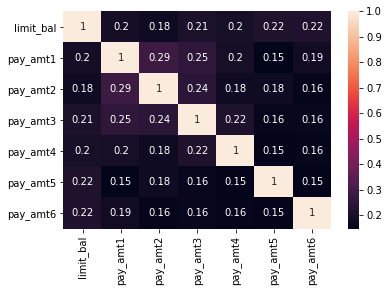

<matplotlib.axes._subplots.AxesSubplot at 0x7f0c88220b50>

In [0]:
# 3.. EXPLORATORY DATA ANALYSIS

print("Summary Payment Stats:")
ccdefault.select('limit_bal','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6').describe().show()
#typical payment amounts
sns.heatmap(ccdefault.select('limit_bal','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6').toPandas().corr(), annot=True)

Summary Bill Stats:
+-------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+----------------+
summary| limit_bal| bill_amt1| bill_amt2| bill_amt3| bill_amt4| bill_amt5| bill_amt6|
+-------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+----------------+
 count| 30000| 30000| 30000| 30000| 30000| 30000| 30000|
 mean|167484.32266666667| 51223.3309|49179.07516666667| 47013.1548| 43262.94896666666|40311.40096666667| 38871.7604|
 stddev|129747.66156720246|73635.86057552966|71173.76878252832|69349.38742703677|64332.856133916444|60797.15577026471|59554.1075367459|
 min| 10000| -165580| -69777| -157264| -170000| -81334| -339603|
 max| 1000000| 964511| 983931| 1664089| 891586| 927171| 961664|
+-------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+----------------+

Out[142]:

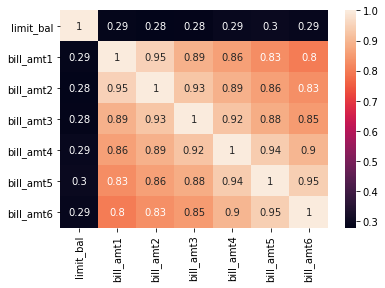

<matplotlib.axes._subplots.AxesSubplot at 0x7f0c8821ee90>

In [0]:
print("Summary Bill Stats:")
ccdefault.select('limit_bal','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6').describe().show()
#typical bill amounts

#plot correlations
sns.heatmap(ccdefault.select('limit_bal','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6').toPandas().corr(), annot=True)

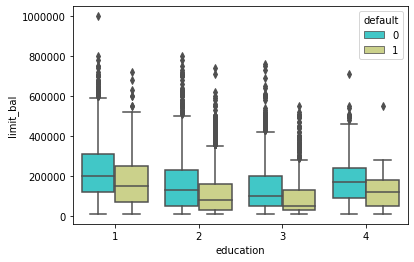

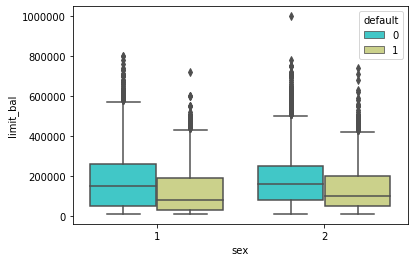

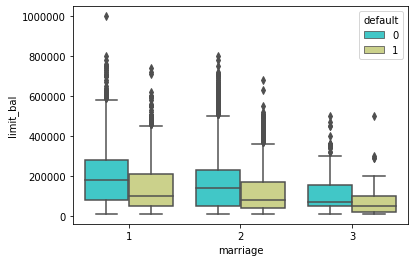

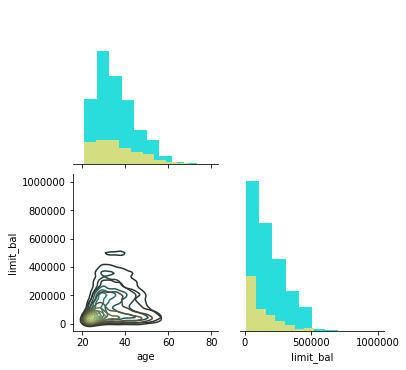

In [0]:
#plot 
data = ccdefault.select('education','sex','marriage','default','limit_bal', 'age').orderBy('limit_bal').toPandas()
# display(data)
#display(data[['age','limit_bal']])
#education
display(sns.boxplot(x="education", y="limit_bal", data=data, hue='default', palette='rainbow'))
#sex
display(sns.boxplot(x="sex", y="limit_bal", data=data, hue='default', palette='rainbow'))
#marriage
display(sns.boxplot(x="marriage", y="limit_bal", data=data, hue='default', palette='rainbow'))
# age
g = sns.PairGrid(data[['age','limit_bal','default']],corner=True, hue='default', palette='rainbow')
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
display(g.fig)


In [0]:
display(ccdefault.select('default','limit_bal').groupBy('default').agg(avg('limit_bal'))) #avg limit_bal is much lower in defaulters than non defaulters

default,avg(limit_bal)
1,130109.65641952984
0,178099.72607430234


Out[145]:

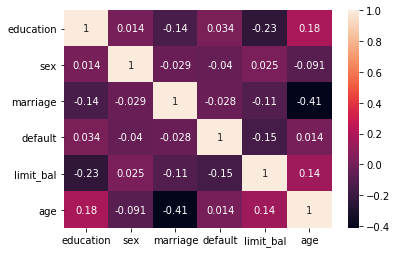

<matplotlib.axes._subplots.AxesSubplot at 0x7f0c65526490>

In [0]:
sns.heatmap(data.corr(),annot=True)

In [0]:
display(ccdefault.select('default','sex').groupBy('sex').agg(avg('default')))

sex,avg(default)
1,0.2416722745625841
2,0.20776280918727916


In [0]:
display(ccdefault.select('default','education').groupBy('education').agg(avg('default')))


education,avg(default)
1,0.19234766178554558
3,0.2515761643278422
4,0.07051282051282051
2,0.23734853884533144


In [0]:
display(ccdefault.select('default','marriage').groupBy('marriage').agg(avg('default')))

marriage,avg(default)
1,0.23471703638626545
3,0.23607427055702918
2,0.20928338762214985


In [0]:
display(ccdefault.select('default','limit_bal').groupBy('limit_bal').agg(avg('default'))) # look into why default rate there is 1, likely only a single/few samples, ie no statistical sig

limit_bal,avg(default)
450000,0.16149068322981366
610000,0.0
350000,0.13852813852813853
410000,0.15384615384615385
500000,0.11218836565096953
260000,0.16698656429942418
130000,0.21536351165980797
210000,0.16027397260273973
270000,0.11764705882352941
220000,0.18976545842217485


In [0]:
# 3. DATA PREPARATION
renamedDefault = ccdefault.withColumnRenamed("default","label")

# separate label, categorical, numerical
colLabel = 'label'
colCat = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
colNum = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']



In [0]:
renamedDefault.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in colNum)).show() # no null values, so no imputing necessary

+---------+---+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+
LIMIT_BAL|AGE|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|
+---------+---+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---------+---+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+

In [0]:
# setup vector assembler
assembler = VectorAssembler(
    inputCols=colNum,
    outputCol="numFeatures")
featuredDefault = assembler.transform(renamedDefault)

# StandardScaler
scaler = StandardScaler(inputCol="numFeatures", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
scaledDefault = scaler.fit(featuredDefault).transform(featuredDefault)
scaledDefault.select('scaledFeatures').show()

+--------------------+
 scaledFeatures|
+--------------------+
(14,[0,1,2,3,4,9]...|
[0.92487215993365...|
[0.69365411995024...|
[0.38536339997235...|
[0.38536339997235...|
[0.38536339997235...|
[3.85363399972358...|
[0.77072679994471...|
[1.07901751992260...|
(14,[0,1,6,7,11,1...|
[1.54145359988943...|
[2.00388967985626...|
[4.85557883965171...|
[0.53950875996130...|
[1.92681699986179...|
[0.38536339997235...|
[0.15414535998894...|
[2.46632575982309...|
(14,[0,1],[2.7746...|
(14,[0,1],[1.3873...|
+--------------------+
only showing top 20 rows

In [0]:
catDefault = scaledDefault.select(colCat)

indexer = StringIndexer(inputCols=colCat, outputCols=["{}_num".format(c) for c in colCat])
indexed = indexer.fit(catDefault).transform(catDefault)
indexed.show()

+---+---------+--------+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+------------+-------+---------+-------------+---------+
SEX|EDUCATION|MARRIAGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|PAY_2_num|PAY_0_num|PAY_4_num|PAY_3_num|MARRIAGE_num|SEX_num|PAY_5_num|EDUCATION_num|PAY_6_num|
+---+---------+--------+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+------------+-------+---------+-------------+---------+
 2| 2| 1| 2| 2| -1| -1| -2| -2| 2.0| 4.0| 1.0| 1.0| 1.0| 0.0| 2.0| 0.0| 2.0|
 2| 2| 2| -1| 2| 0| 0| 0| 2| 2.0| 1.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 3.0|
 2| 2| 2| 0| 0| 0| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0|
 2| 2| 1| 0| 0| 0| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0| 0.0| 0.0|
 1| 2| 1| -1| 0| -1| 0| 0| 0| 0.0| 1.0| 0.0| 1.0| 1.0| 1.0| 0.0| 0.0| 0.0|
 1| 1| 2| 0| 0| 0| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 1.0| 0.0|
 1| 1| 2| 0| 0| 0| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 1.0| 0.0|
 2| 2| 2| 0| -1| -1| 0| 0| -1| 1.0| 0.0| 0.0| 1.0| 0.0| 0.0| 0.0| 0.0| 1.0|
 2| 3| 1| 0| 0| 2| 0| 0| 0| 0.0| 0.0| 0.0| 3.0| 1.0| 0.0| 0.0| 2.0| 0.0|
 1| 3| 2| -2| -2| -2| -2| -1| -1| 3.0| 3.0| 2.0| 2.0| 0.0| 1.0| 1.0| 2.0| 1.0|
 2| 3| 2| 0| 0| 2| 0| 0| -1| 0.0| 0.0| 0.0| 3.0| 0.0| 0.0| 0.0| 2.0| 1.0|
 2| 1| 2| -1| -1| -1| -1| -1| 2| 1.0| 1.0| 1.0| 1.0| 0.0| 0.0| 1.0| 1.0| 3.0|
 2| 2| 2| -1| 0| -1| -1| -1| -1| 0.0| 1.0| 1.0| 1.0| 0.0| 0.0| 1.0| 0.0| 1.0|
 1| 2| 2| 1| 2| 2| 0| 0| 2| 2.0| 2.0| 0.0| 3.0| 0.0| 1.0| 0.0| 0.0| 3.0|
 1| 1| 2| 0| 0| 0| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 1.0| 0.0|
 2| 3| 3| 1| 2| 0| 0| 0| 0| 2.0| 2.0| 0.0| 0.0| 2.0| 0.0| 0.0| 2.0| 0.0|
 1| 1| 2| 0| 0| 2| 2| 2| 2| 0.0| 0.0| 3.0| 3.0| 0.0| 1.0| 3.0| 1.0| 3.0|
 1| 1| 1| 0| 0| 0| -1| -1| -1| 0.0| 0.0| 1.0| 0.0| 1.0| 1.0| 1.0| 1.0| 1.0|
 2| 1| 1| 1| -2| -2| -2| -2| -2| 3.0| 2.0| 2.0| 2.0| 1.0| 0.0| 2.0| 1.0| 2.0|
 2| 1| 2| 1| -2| -2| -2| -2| -2| 3.0| 2.0| 2.0| 2.0| 0.0| 0.0| 2.0| 1.0| 2.0|
+---+---------+--------+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+------------+-------+---------+-------------+---------+
only showing top 20 rows

In [0]:
encoder = OneHotEncoder(inputCols=["{}_num".format(c) for c in colCat], outputCols=["{}_onehot".format(c) for c in colCat])                    
model = encoder.fit(indexed)
encoded = model.transform(indexed)

In [0]:
# 4. PIPELINE

numPipeline = Pipeline(stages=[assembler,scaler])
catPipeline = Pipeline(stages=[indexer,encoder])
pipeline = Pipeline().setStages([numPipeline, catPipeline])
newDefault = pipeline.fit(renamedDefault).transform(renamedDefault)

In [0]:
features = ['scaledFeatures'] + ["{}_onehot".format(c) for c in colCat]
# setup vector assembler
assembler2 = VectorAssembler(
    inputCols=features,
    outputCol='features')
dataset = assembler2.transform(newDefault)

In [0]:
# 5. MODELS 
trainSet, testSet = dataset.select('features','label').randomSplit([0.8, 0.2], seed=34)

In [0]:
# logistic regression

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(trainSet)

# Compute raw scores on the test set
predictions = lrModel.transform(testSet)
scoresAndLabels = predictions.select('rawPrediction','label')
# evaluate
evaluator = BinaryClassificationEvaluator()
print("Area under Precision-Recall Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderPR"}))
print("Area under Receiver Operating Characteristics Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderROC"}))

Area under Precision-Recall Curve:
 0.2204499664204164
Area under Receiver Operating Characteristics Curve:
 0.5

In [0]:
# decision tree classifier

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dtModel = dt.fit(trainSet)

# Compute raw scores on the test set
predictions = dtModel.transform(testSet)
scoresAndLabels = predictions.select('rawPrediction','label')
# evaluate
evaluator = BinaryClassificationEvaluator()
print("Area under Precision-Recall Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderPR"}))
print("Area under Receiver Operating Characteristics Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderROC"}))

Area under Precision-Recall Curve:
 0.17926641467744597
Area under Receiver Operating Characteristics Curve:
 0.3438535009749421

In [0]:
# random forest classifier

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(minInstancesPerNode=5)
rfModel = rf.fit(trainSet)

# Compute raw scores on the test set
predictions = rfModel.transform(testSet)
scoresAndLabels = predictions.select('rawPrediction','label')
# evaluate
evaluator = BinaryClassificationEvaluator()
print("Area under Precision-Recall Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderPR"}))
print("Area under Receiver Operating Characteristics Curve:\n", evaluator.evaluate(scoresAndLabels, {evaluator.metricName: "areaUnderROC"}))

Area under Precision-Recall Curve:
 0.5604037812164893
Area under Receiver Operating Characteristics Curve:
 0.7751897516165245

In [0]:
# 6. FINE TUNING 

rf2 = RandomForestClassifier(minInstancesPerNode=5)
evaluator2 = BinaryClassificationEvaluator()
# parameters to search
paramGrid2 = ParamGridBuilder()\
    .addGrid(rf2.maxDepth, [5,10,15]) \
    .addGrid(rf2.minInfoGain, [0.05, 0.1])\
    .addGrid(rf2.numTrees, [5, 10, 20])\
    .build()

paramGrid3 = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [5,10,15]) \
    .addGrid(dt.minInstancesPerNode, [3,7])\
    .addGrid(dt.minInfoGain, [0.05, 0.1])\
    .build()

paramGrid4 = ParamGridBuilder()\
    .addGrid(lr.elasticNetParam, [0.1,0.5,0.9]) \
    .addGrid(lr.threshold, [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])\
    .build()

paramGrid5 = paramGrid2 + paramGrid3 + paramGrid4

# setup crossval for random forest model, regression evaluator, paramgrid
crossval2 = CrossValidator(estimator=rf2,
                          estimatorParamMaps=paramGrid5,
                          evaluator=evaluator2,
                          numFolds=7)
# fit
cvModel = crossval2.fit(trainSet)
# predict
predictions = cvModel.transform(testSet)
scoresAndLabels = predictions.select('rawPrediction','label')
# evaluate
print("Area under Precision-Recall Curve:\n", evaluator2.evaluate(scoresAndLabels, {evaluator2.metricName: "areaUnderPR"}))
print("Area under Receiver Operating Characteristics Curve:\n", evaluator2.evaluate(scoresAndLabels, {evaluator2.metricName: "areaUnderROC"}))


MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
Area under Precision-Recall Curve:
 0.5604037812164893
Area under Receiver Operating Characteristics Curve:
 0.7751897516165245

In [0]:
# 6. FINE TUNING 

rf2 = RandomForestClassifier(minInstancesPerNode=5)
evaluator2 = BinaryClassificationEvaluator()
# parameters to search
paramGrid2 = ParamGridBuilder()\
    .addGrid(rf2.maxDepth, [5,10,15]) \
    .addGrid(rf2.minInfoGain, [0.05, 0.1])\
    .addGrid(rf2.numTrees, [5, 10, 20])\
    .build()
# setup crossval for random forest model, regression evaluator, paramgrid
crossval2 = CrossValidator(estimator=rf2,
                          estimatorParamMaps=paramGrid2,
                          evaluator=evaluator2,
                          numFolds=7)
# fit
cvModel = crossval2.fit(trainSet)
# predict
predictions = cvModel.transform(testSet)
scoresAndLabels = predictions.select('rawPrediction','label')
# evaluate
print("Area under Precision-Recall Curve:\n", evaluator2.evaluate(scoresAndLabels, {evaluator2.metricName: "areaUnderPR"}))
print("Area under Receiver Operating Characteristics Curve:\n", evaluator2.evaluate(scoresAndLabels, {evaluator2.metricName: "areaUnderROC"}))


MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
Area under Precision-Recall Curve:
 0.2204499664204164
Area under Receiver Operating Characteristics Curve:
 0.5